Data Shape: (2011, 10)
          ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0   8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
1   9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
2   5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
3  10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   
4   8.635849  203.361523  13672.09176     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       18.436525       100.341674   4.628771           0  
1       11.558279        31.997993   4.075075           0  
2        8.399735        54.917862   2.559708           0  
3       13.789695        84.603556   2.672989           0  
4       12.363817        62.798309   4.401425           0  

✅ Model Evaluation
Accuracy: 0.7291666666666666

Classification Report:
               precision    recall  f1-score   support

       

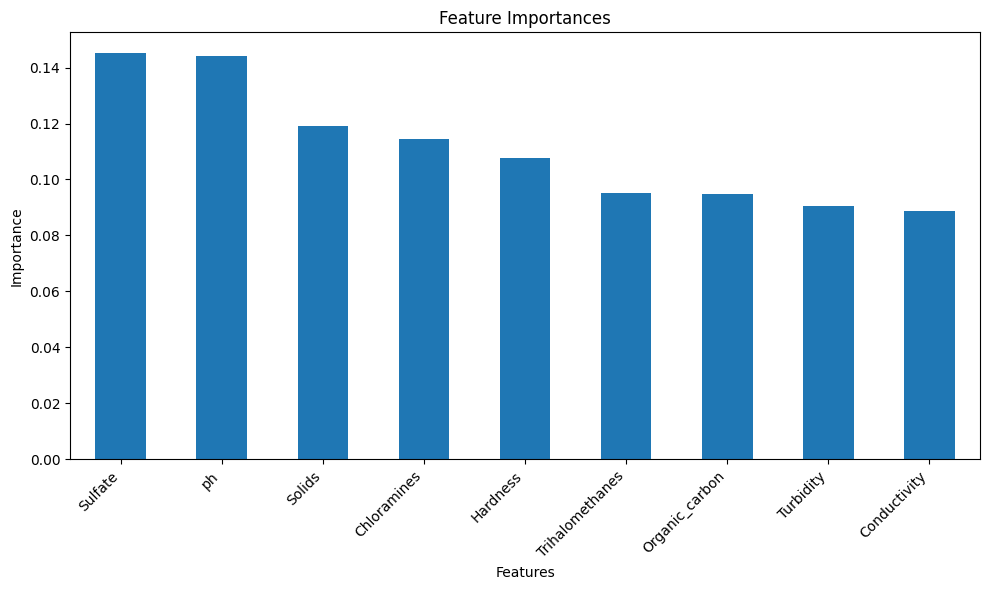

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("water_data.csv")
print("Data Shape:", df.shape)
print(df.head())

# 2. Features (X) and Target (y)
X = df.drop("Potability", axis=1)
y = df["Potability"]

# 3. Feature Scaling
scaler = StandardScaler()
scaler.fit(X) # Fit the scaler on the DataFrame

# 4. Balance dataset with SMOTE (to fix class imbalance)
X_scaled = scaler.transform(X) # Transform the data to a numpy array
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 5. Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 6. Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Predictions
y_pred = rf_model.predict(X_test)

# 8. Evaluation
print("\n✅ Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Test with a new sample (Example values: pH=7.0, Hardness=200, etc.)
sample = [[7.0, 200, 15000, 8.0, 300, 400, 15, 60, 3]]  # Change with real values
sample_df = pd.DataFrame(sample, columns=X.columns) # Convert sample to DataFrame with correct column names
sample_scaled = scaler.transform(sample_df) # Transform the DataFrame
prediction = rf_model.predict(sample_scaled)

print("\n🔮 Prediction for Sample:", "Drinkable ✅" if prediction[0]==1 else "Not Drinkable ❌")

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization
# Use the column names from the original DataFrame X
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("\nFeature Importances:\n", sorted_feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()